In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import xgboost as xgb  #GBM algorithm
from xgboost import XGBRegressor
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   # Perforing grid search

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('data/new_train.csv')
test_data = pd.read_csv('data/new_test.csv')

print train_data.shape
display(train_data.head(1))
# display(train_data.info())

print test_data.shape
display(test_data.head(1))
# display(test_data.info())
train_length = train_data.shape[0]

(1452, 353)


,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id,SalePrice
0,0.625,0.405761,1,0.0,1.0,0.875,0.625,0.998007,0.998007,0.353963,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,12.247699


(1459, 352)


,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id
0,0.769231,0.523724,1,0.0,1.0,0.625,0.75,0.97708,0.97708,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1461


In [3]:
import math

def common_num_range(start,stop,step):
    
    startlen = stoplen = steplen = 0
    if '.' in str(start):
        startlen = len(str(start)) - str(start).index('.') - 1
    if '.' in str(stop):
        stoplen = len(str(stop)) - str(stop).index('.') - 1
    if '.' in str(step):
        steplen = len(str(step)) - str(step).index('.') - 1
    
    maxlen = startlen
    if stoplen > maxlen:
        maxlen = stoplen
    if steplen > maxlen:
        maxlen = steplen
    
    power = math.pow(10, maxlen)
    
    if startlen == 0 and stoplen == 0 and steplen == 0:
        return range(start, stop, step)
    else:
        return [num / power for num in range(int(start*power), int(stop*power), int(step*power))]


In [4]:
train_id = train_data['Id']
train_Y = train_data['SalePrice']
train_data.drop(['Id', 'SalePrice'], axis=1, inplace=True)
train_X = train_data

test_Id = test_data['Id']
test_data.drop('Id', axis=1, inplace=True)
test_X = test_data

# Lasso & Parameter Tuning

In [15]:
from sklearn.linear_model import Lasso, LassoCV
model = LassoCV(cv=20).fit(train_X, train_Y)

(0.97179061070004658,
 3.9717906107000465,
 0.0067518230347368945,
 0.2093119966236488)

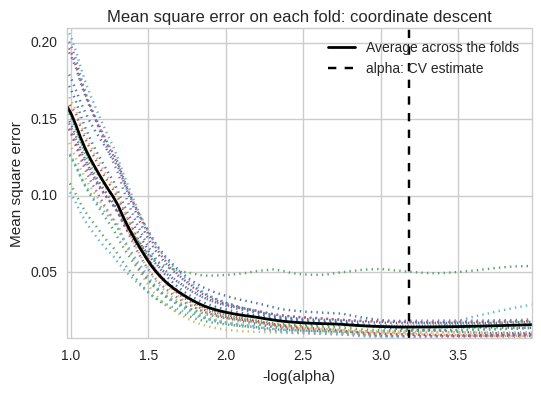

In [16]:
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

In [19]:
# -log(alpha) = 3.5
best_alpha = np.exp(-3.5)
print best_alpha 

0.0301973834223


In [20]:
# The error metric: RMSE on the log of the sale prices.
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

```
class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
```

In [21]:
best_alpha = 0.00099

lasso_regressor = Lasso(alpha=best_alpha, max_iter=50000)
lasso_regressor.fit(train_X, train_Y)


lasso_predictions = lasso_regressor.predict(train_X)
# lasso_predictions = np.expm1(lasso_predictions)

rmse(lasso_predictions, train_Y)

193208.71273037727